In [2]:
!pip install mediapipe opencv-python numpy scipy


In [3]:
from pydub import AudioSegment
from pydub.playback import play

In [4]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt 

In [6]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)



# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [7]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
from PIL import Image
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
from tkinter import *
from winsound import PlaySound, SND_FILENAME, SND_LOOP, SND_ASYNC
import winsound
import pygame
import time
import matplotlib.pyplot as plt


pygame 2.5.2 (SDL 2.28.3, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
pygame.mixer.init()

def callback(sv):
    if sv == "PLAY":
        play_audio()
    else:
        stop_audio()
        
def play_audio():
    pygame.mixer.init()
    pygame.mixer.music.load("C:/Users/User/Downloads/f1_team_radio_loud.wav")
    pygame.mixer.music.play(-1)  # -1 indicates looping indefinitely

def stop_audio():
    pygame.mixer.music.stop()



In [10]:
# CALCULATE ANGLES

def calculate_angles(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Second 
    c = np.array(c) # Third
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    return angle
    

In [11]:
!pip install pygame

In [12]:
# def callback(sv):    
#     if(sv=="PLAY"):
#      winsound.PlaySound("C:/Users/User/Downloads/f1_team_radio_loud.wav", winsound.SND_FILENAME|SND_LOOP|SND_ASYNC)
#     else:
#      winsound.PlaySound(None, SND_FILENAME)
from pygame import *
import pygame
pygame.mixer.init()

def play_audio():
    pygame.mixer.init()
    pygame.mixer.music.load("C:/Users/User/Downloads/f1_team_radio_loud.wav")
    pygame.mixer.music.play(-1)  # -1 indicates looping indefinitely

def stop_audio():
    pygame.mixer.music.stop()

def callback(sv):
    if sv == "PLAY":
        play_audio()
    else:
        stop_audio()


In [13]:
import time

In [14]:
print(image2.shape[0])

NameError: name 'image2' is not defined

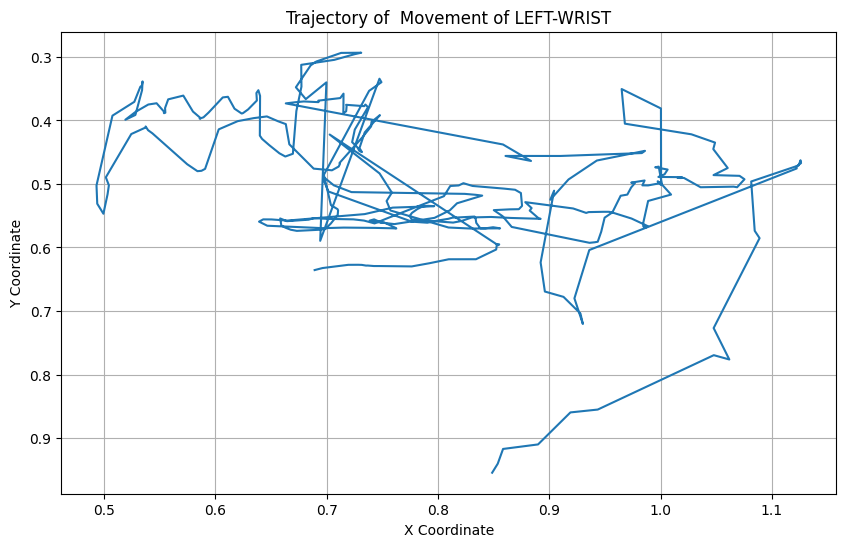

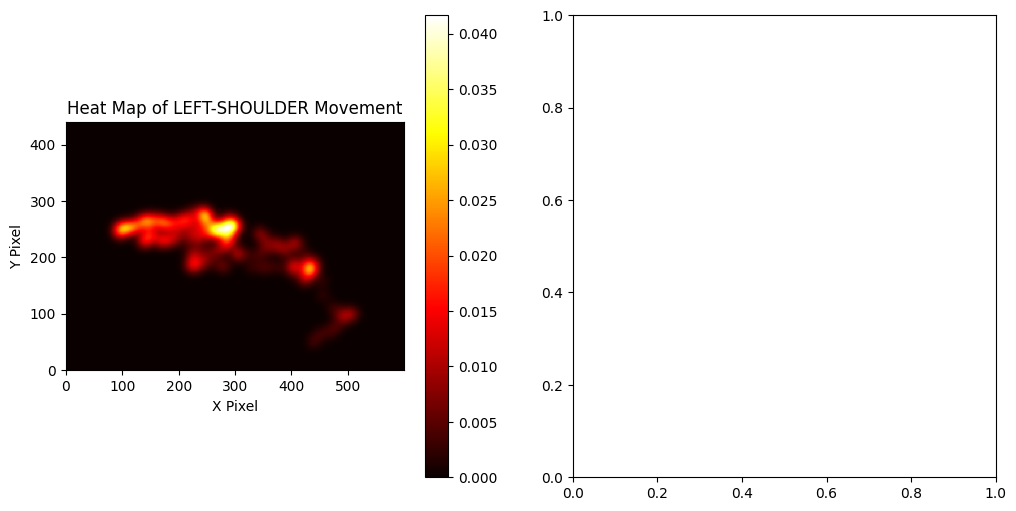

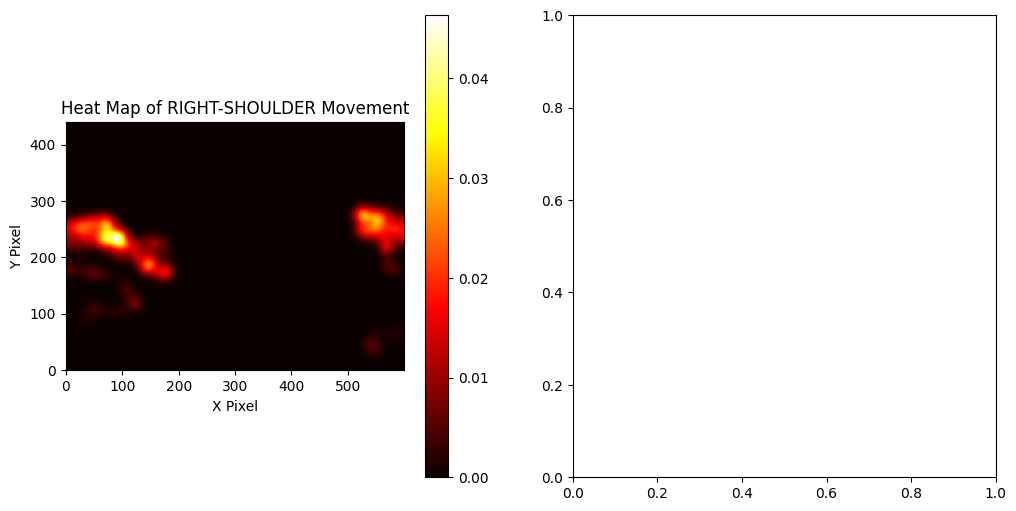

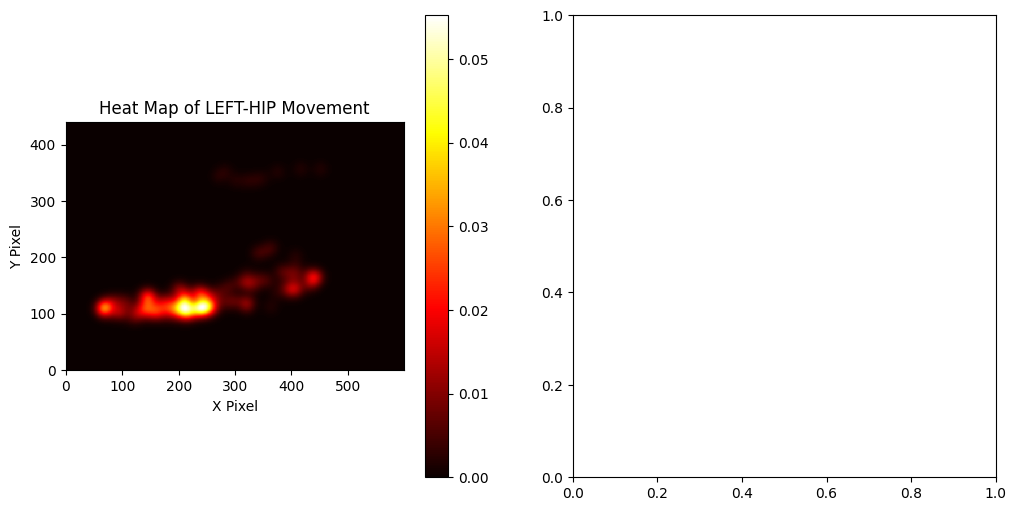

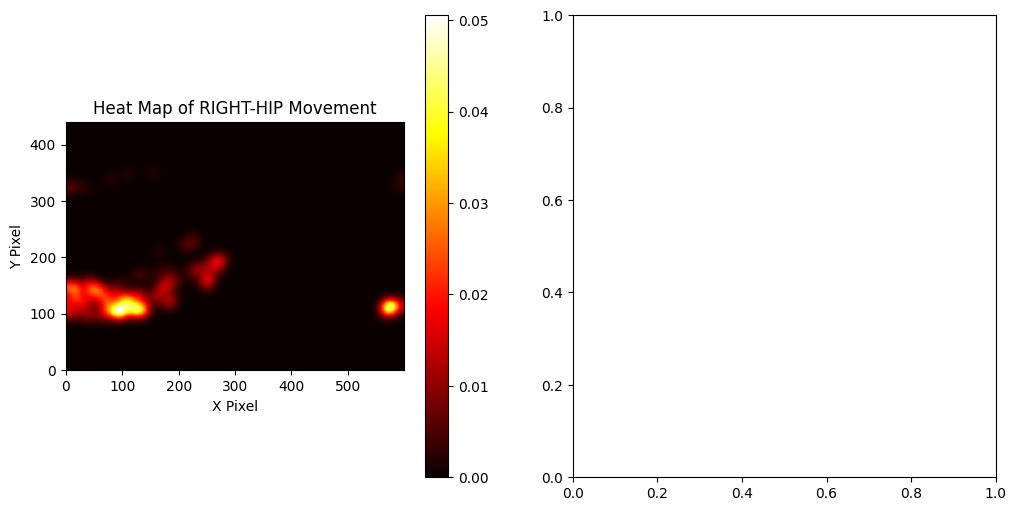

In [27]:
pygame.mixer.init()
def play_audio():
    pygame.mixer.init()
    sound = pygame.mixer.Sound("C:/Users/User/Downloads/f1_team_radio_loud.wav")
    if not pygame.mixer.get_busy():
        sound.play(-1)  # -1 indicates looping indefinitely

def stop_audio():
    pygame.mixer.stop()

def callback(sv):
    if sv == "PLAY":
        play_audio()
    else:
        stop_audio()
        
        
## SHOULDER PRESS


# MAKE DETECTIONS

  
cap = cv2.VideoCapture(0)


# CURL COUNTER VARIABLES

counter = 0
stage = None
audio_duration = 2
sum = 0
trajectory = []
data_points_lshoulder = []
data_points_rshoulder = []
data_points_lhip = []
data_points_rhip= []
keypoint_positions = []
timestamps = []


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened() :
        ret, frame = cap.read()
        width = 1200
        height = 880
        dim = (width, height)

        frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
        
        # DETECT STUFF AND RENDER
        
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image2=image
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # PLAY AUDIO ALERT
        
#         sum=0
        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # GET COORDINATES
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            
            data_points_lshoulder.append(((int(left_shoulder[0] * image.shape[1]))%600, (int(left_shoulder[1] * image.shape[0]))%440))

            data_points_rshoulder.append(((int(right_shoulder[0] * image.shape[1]))%600, (int(right_shoulder[1] * image.shape[0]))%440))

            
            
            keypoint_positions.append((right_shoulder[0] * frame.shape[1], right_shoulder[1] * frame.shape[0]))
            timestamps.append(time.time())
            
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            
            trajectory.append([left_wrist[0],left_wrist[1]])

#             data_points_lshoulder.append(((int(left_wrist[0] * image.shape[1]))%100, (int(left_wrist[1] * image.shape[0]))%100))

            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            
            data_points_lhip.append(((int(left_hip[0] * image.shape[1]))%600, (int(left_hip[1] * image.shape[0]))%440))

            data_points_rhip.append(((int(right_hip[0] * image.shape[1]))%600, (int(right_hip[1] * image.shape[0]))%440))

            
            

            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]


            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]

            
            # CALCULATE THE ANGLE
            lower_body_1 = calculate_angles(left_ankle,left_knee,left_hip)
            lower_body_2 = calculate_angles(right_ankle,right_knee,right_hip)

            middle_body_1 = calculate_angles(left_knee,left_hip,left_shoulder)
            middle_body_2 = calculate_angles(right_knee,right_hip,right_shoulder)

            upper_body_1 = calculate_angles(left_hip,left_shoulder,left_wrist)
            upper_body_2 = calculate_angles(right_hip,right_shoulder,right_wrist)
            
#             
            # VISUALIZE ANGLE
            cv2.putText(image,str(lower_body_1),
                       tuple(np.multiply(left_knee, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(lower_body_2),
                       tuple(np.multiply(right_knee, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(middle_body_1),
                       tuple(np.multiply(left_hip, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(middle_body_2),
                       tuple(np.multiply(right_hip, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(upper_body_1),
                       tuple(np.multiply(left_shoulder, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(upper_body_2),
                       tuple(np.multiply(right_shoulder, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            
#             CHECKING CONDITIONS

            lb = (lower_body_1 + lower_body_2)/2
            mb = (middle_body_1 + middle_body_2)/2
            ub = (upper_body_1 + upper_body_2)/2
            sum=0
            for it in landmarks:
                sum+=it.visibility
            avg=sum/len(landmarks)
            avg="{0:.4f}".format(avg)
            avg=str(avg)

#             print(avg)
#             print(sum)
            
#             if angle > 160 and angle2 < 110:
#                 song = AudioSegment.from_mp3("E:/capstone/alert.mp3")
#                 play_audio("E:/capstone/alert.mp3",audio_duration)
#                 stage="down"
#             if angle < 110 and angle2 > 150:
            if((lb>=160 and lb<=180) and (mb>=50 and mb<=90) and (ub>=150 and ub<=180)):
#                 if stage == "down":
                stop_audio()
                stage="OK"
                counter+=1
                print(stage)
#                 pygame.mixer.music.stop()

#                 callback("NO")
#                 winsound.PlaySound(None, SND_FILENAME)
                    

            else:
                
                stage="INCORRECT"
                play_audio()
#                 pygame.mixer.init()
#                 pygame.mixer.music.load("C:/Users/User/Downloads/f1_team_radio_loud.wav")
#                 pygame.mixer.music.play(-1)  # -1 indicates looping indefinitely
#                 callback("PLAY")
#                 winsound.PlaySound("C:/Users/User/Downloads/f1_team_radio_loud.wav", winsound.SND_FILENAME|SND_LOOP|SND_ASYNC)

#                 print(stage)
#             print(landmarks)
        except:
            avg="0"
            pass
        
#         sum=0
#         for it in landmarks:
#             sum+=it.visibility
#         avg=sum/33
#         avg="{0:.3f}".format(avg)
#         avg=str(avg)
        
#         print(avg)

        
        # RENDER CURL COUNTER
        # setup status box
        
        cv2.rectangle(image,(0,0), (255,93), (245,117,16), -1)
        
        # REP DATA
        
#         cv2.putText(image, 'REPS', (15,12),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, str(counter),
#                    (10,60),
#                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        
         # STAGE DATA
        
        cv2.putText(image, 'STAGE-> ', (1,32),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (75,40),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, 'CONF.-> ', (1,78),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, avg,
                   (90,80),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
#             callback("NO")
#             pygame.mixer.music.stop()
            stop_audio()

            break
    cap.release()
    cv2.destroyAllWindows()

    


# GENERATE TRAJECTORY

gen_trajectory(trajectory,"LEFT-WRIST");




# GENERATE HEAT MAPS


hmap_gen(data_points_lshoulder,"LEFT-SHOULDER")
hmap_gen(data_points_rshoulder,"RIGHT-SHOULDER")
hmap_gen(data_points_lhip,"LEFT-HIP")
hmap_gen(data_points_rhip,"RIGHT-HIP") 

In [ ]:
trajectory

In [24]:
def hmap_gen(data_points,str):
    # Initialize a 2D histogram with zeros
    heat_map = np.zeros((440,600))

    # Increment the positions where the nose was located
    for x, y in data_points:
        heat_map[y, x] += 1

    from scipy.ndimage  import gaussian_filter

    # Apply Gaussian filter to smooth the maps
    smoothed_map_left = gaussian_filter(heat_map, sigma=10)
    # smoothed_map_right = gaussian_filter(heat_map_right, sigma=10)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap for the left heel
    heatmap1 = ax[0].imshow(smoothed_map_left, cmap='hot', interpolation='nearest')
    ax[0].set_title("Heat Map of "+str+" Movement")
    ax[0].set_xlabel('X Pixel')
    ax[0].set_ylabel('Y Pixel')
    ax[0].invert_yaxis()  # Optional: Match the image coordinate system
    fig.colorbar(heatmap1, ax=ax[0])  # Adding a colorbar to the first subplot

    plt.show()






In [17]:
# TRAJECTORY 


def gen_trajectory(trajectory,str):
    trajectory = np.array(trajectory)
#     trajectory = [(x * frame.shape[1], y * frame.shape[0]) for x, y in trajectory]

    x_coords, y_coords = zip(*trajectory)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_coords, y_coords, linestyle='-')
    plt.gca().invert_yaxis()  # Invert the y-axis to match image coordinates
    plt.title('Trajectory of  Movement of '+str)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

In [34]:
# Convert lists to numpy arrays
keypoint_positions = np.array(keypoint_positions)
timestamps = np.array(timestamps)

# Calculate distances between consecutive positions
distances = np.linalg.norm(np.diff(keypoint_positions, axis=0), axis=1)
time_diffs = np.diff(timestamps)

# Calculate speeds (distance/time)
speeds = distances / time_diffs

# Handle any infinite or NaN values
speeds = np.where(np.isfinite(speeds), speeds, 0)


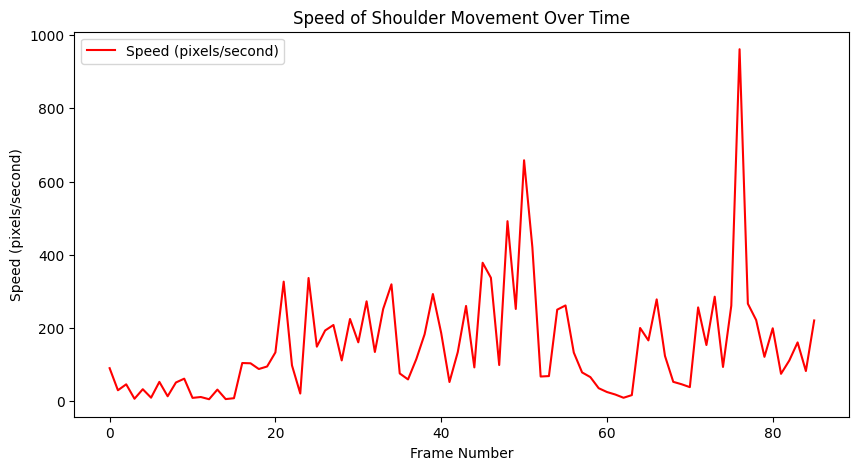

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(speeds, label='Speed (pixels/second)', color='red')
plt.xlabel('Frame Number')
plt.ylabel('Speed (pixels/second)')
plt.title('Speed of Shoulder Movement Over Time')
plt.legend()
plt.show()


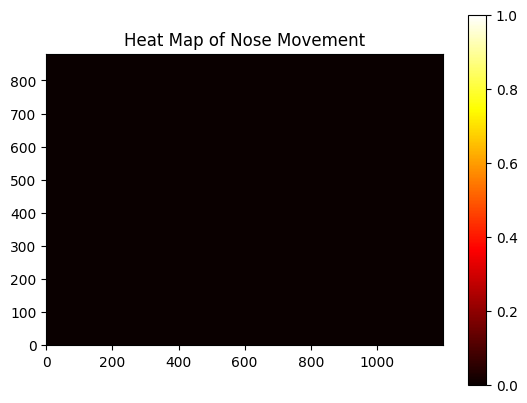

In [13]:
pygame.mixer.init()
def play_audio():
    pygame.mixer.init()
    sound = pygame.mixer.Sound("C:/Users/User/Downloads/f1_team_radio_loud.wav")
    if not pygame.mixer.get_busy():
        sound.play(-1)  # -1 indicates looping indefinitely

def stop_audio():
    pygame.mixer.stop()

def callback(sv):
    if sv == "PLAY":
        play_audio()
    else:
        stop_audio()
        


cap = cv2.VideoCapture(0)


# CURL COUNTER VARIABLES

counter = 0
stage = None
audio_duration = 2
sum = 0
heat_map = np.zeros((880, 1200))



with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose :
    while cap.isOpened():
        ret, frame = cap.read()
        width = 1200
        height = 880
        dim = (width, height)

        frame = cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)
        # DETECT STUFF AND RENDER
        
        #RECOLOR IMAGE TO RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image2 = image 
        image.flags.writeable = False
        
        # MAKE DETECTION
        results = pose.process(image)
        
        #RECOLOR BACK TO BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        
        # EXTRACT LANDMARKS
        
        try:
            landmarks = results.pose_landmarks.landmark
            
            # GET COORDINATES
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y] 
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            
            shoulder_position = (int(left_shoulder[0] ), int(left_shoulder[1]))
            heat_map[shoulder_position[1], shoulder_position[0]] += 1


            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]

            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            mid_hip_pt = [(left_hip[0]+right_hip[0])/2 , (left_hip[1]+right_hip[1])/2]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]

            print("L: ",left_hip,"\nR: ",right_hip,"\n",mid_hip_pt)

            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]



            nose = [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y]

            
            # CALCULATE THE ANGLE
#             leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
#             leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

#             hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
#             hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)

#             shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
#             shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

#             arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
#             arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)
            leg_1 = calculate_angles(left_ankle,left_knee,left_hip)
            leg_2 = calculate_angles(right_ankle,right_knee,right_hip)

            hip_1 = calculate_angles(left_knee,left_hip,left_shoulder)
            hip_triangle = calculate_angles(left_ankle,mid_hip_pt,right_ankle)
            hip_2 = calculate_angles(right_knee,right_hip,right_shoulder)

            shoulder_1 = calculate_angles(left_hip,left_shoulder,left_elbow)
            shoulder_2 = calculate_angles(right_hip,right_shoulder,right_elbow)

            arms_1 = calculate_angles(left_shoulder,left_elbow,left_wrist)
            arms_2 = calculate_angles(right_shoulder,right_elbow,right_wrist)

            
            
            # VISUALIZE ANGLE
            cv2.putText(image,str(leg_1),
                       tuple(np.multiply(left_knee, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(leg_2),
                       tuple(np.multiply(right_knee, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(hip_triangle),
                       tuple(np.multiply(mid_hip_pt, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
#             cv2.putText(image,str(hip_1),
#                        tuple(np.multiply(left_hip, [640,480]).astype(int)),
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
#                        )
#             cv2.putText(image,str(hip_2),
#                        tuple(np.multiply(right_hip, [640,480]).astype(int)),
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
#                        )
            cv2.putText(image,str(shoulder_1),
                       tuple(np.multiply(left_shoulder, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(shoulder_2),
                       tuple(np.multiply(right_shoulder, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(arms_1),
                       tuple(np.multiply(left_elbow, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            cv2.putText(image,str(arms_2),
                       tuple(np.multiply(right_elbow, [1200,880]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                       )
            
            
            
#             CHECKING CONDITIONS

            arms = (arms_1 + arms_2)/2
            shoulder = (shoulder_1 + shoulder_2)/2
#             hips = (hips_1 + hips_2)/2
            hips = hip_triangle *2
            legs = (leg_1 + leg_2)/2
            sum=0
            for it in landmarks:
                sum+=it.visibility
            avg=sum/len(landmarks)
            avg="{0:.4f}".format(avg)
            avg=str(avg)
            
                

            if((arms>=160 and arms<=180) and (shoulder>=80 and shoulder<=110) and (hips>=80 and hips<=105) and (legs>=160 and legs<=180)):
                stop_audio()
                stage="OK"
                counter+=1
                print(stage)
            else:
                stage="INCORRECT"
                play_audio()
#             print(landmarks)
        except:
            avg="0"
            pass
        
        
        # RENDER CURL COUNTER
        # setup status box
        
        cv2.rectangle(image,(0,0), (255,93), (245,117,16), -1)
        

         # STAGE DATA
        
        cv2.putText(image, 'STAGE-> ', (1,32),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (75,40),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(image, 'CONF.-> ', (1,78),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, avg,
                   (90,80),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        
        
        
#         print(results)

        # RENDER DETECTIONS
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 )
        
        
        cv2.imshow('MediaPipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            stop_audio()
            break
    cap.release()
    cv2.destroyAllWindows()

    
    
normalized_heat_map = heat_map / np.max(heat_map)
plt.imshow(normalized_heat_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Heat Map of Nose Movement")
plt.gca().invert_yaxis()  # Optional
plt.show()


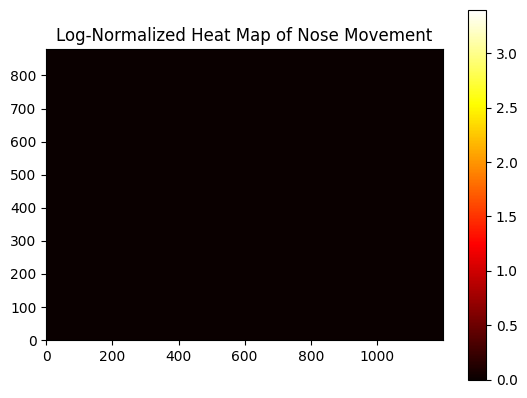

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Apply a logarithmic normalization
log_norm = np.log1p(heat_map)  # log1p is log(1+x) which handles zero values well

plt.imshow(log_norm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Log-Normalized Heat Map of Nose Movement")
plt.gca().invert_yaxis()
plt.show()


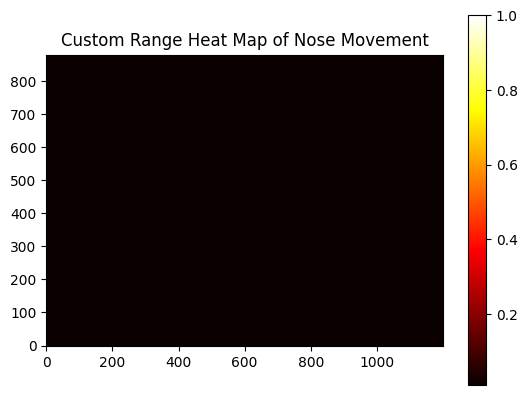

In [30]:
# Normalize the heatmap manually to adjust sensitivity
normalized_heat_map = heat_map / np.max(heat_map)
# Set a custom range for the colormap
plt.imshow(normalized_heat_map, cmap='hot', interpolation='nearest', vmin=0.01, vmax=1)
plt.colorbar()
plt.title("Custom Range Heat Map of Nose Movement")
plt.gca().invert_yaxis()
plt.show()


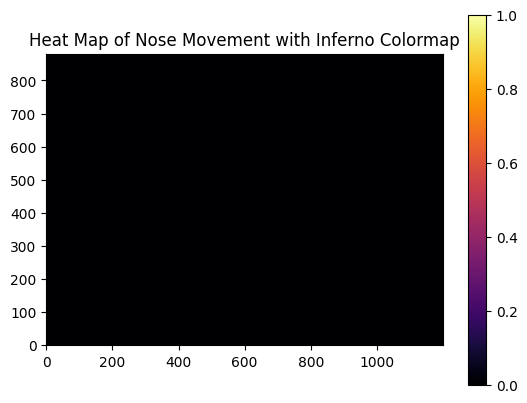

In [31]:
plt.imshow(normalized_heat_map, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.title("Heat Map of Nose Movement with Inferno Colormap")
plt.gca().invert_yaxis()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_26656\2345055229.py:3: RuntimeWarning: divide by zero encountered in true_divide
  normalized_heat_map = heat_map / percentile_99
C:\Users\User\AppData\Local\Temp\ipykernel_26656\2345055229.py:3: RuntimeWarning: invalid value encountered in true_divide
  normalized_heat_map = heat_map / percentile_99


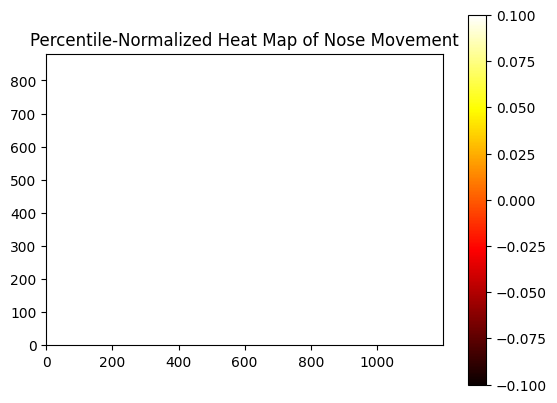

In [32]:
# Use the 99th percentile to normalize the heatmap
percentile_99 = np.percentile(heat_map, 99)
normalized_heat_map = heat_map / percentile_99

plt.imshow(normalized_heat_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Percentile-Normalized Heat Map of Nose Movement")
plt.gca().invert_yaxis()
plt.show()


In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
data = np.random.randn(10, 10)


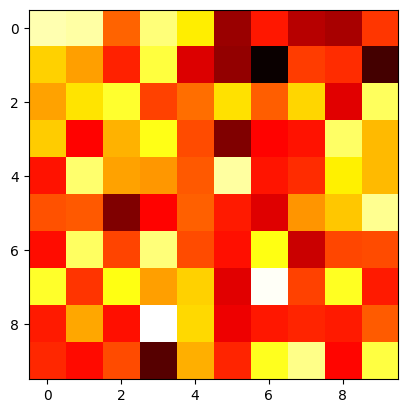

In [87]:
heatmap = plt.imshow(data, cmap='hot')


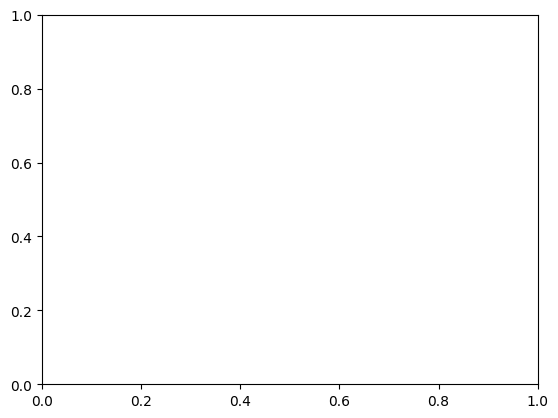

In [88]:
plt.colorbar(heatmap)


In [89]:
plt.show()


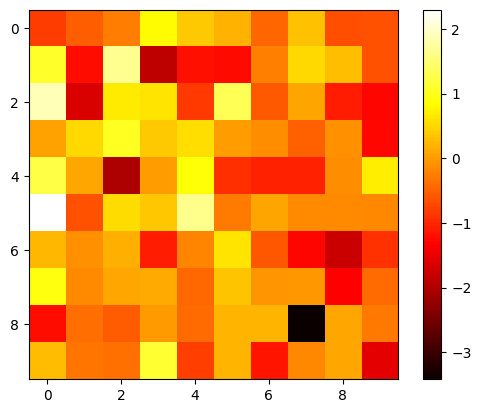

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Create a data matrix
data = np.random.randn(10, 10)

# Create a heatmap object
heatmap = plt.imshow(data, cmap='hot')

# Add a colorbar
plt.colorbar(heatmap)

# Display the heatmap
plt.show()